# Heart Disease Prediction



![image.png](https://t3.ftcdn.net/jpg/06/06/29/34/360_F_606293479_9iTncv5OBYwY2RBMsFa6yTmIedXjR1VZ.jpg)

### Heart disease is one of the leading causes of death worldwide. Early detection can significantly improve the chances of effective treatment and management. This project aims to develop a machine learning model to predict the likelihood of heart disease based on various health metrics.

# Importing necessary libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from joblib import dump, load

# Loading the dataset

In [3]:
data = pd.read_csv('/content/heart.csv')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Data Preprocessing

## Chacking for Null values

In [4]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## One-Hot encoding

In [6]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Feature scaling
scaler = StandardScaler()
features = data_encoded.drop('target', axis=1)
scaled_features = scaler.fit_transform(features)

# Create a DataFrame for scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Combine the scaled features with the target
processed_data = pd.concat([scaled_features_df, data_encoded['target']], axis=1)

In [7]:
# # Save the scaler to disk
# scaler_file_path = 'scaler.joblib'
# dump(scaler, scaler_file_path)

['scaler.joblib']

In [8]:
processed_data.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,-0.661504,0.661504,1.030715,-0.441179,-0.619085,...,-1.137130,-0.531840,2.578615,-0.268655,-0.133697,-0.082923,-0.258065,-1.063474,1.224745,0
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,-0.661504,0.661504,1.030715,-0.441179,-0.619085,...,0.879407,-0.531840,-0.387805,-0.268655,-0.133697,-0.082923,-0.258065,-1.063474,1.224745,0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,-0.661504,0.661504,1.030715,-0.441179,-0.619085,...,0.879407,-0.531840,-0.387805,-0.268655,-0.133697,-0.082923,-0.258065,-1.063474,1.224745,0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,-0.661504,0.661504,1.030715,-0.441179,-0.619085,...,-1.137130,1.880265,-0.387805,-0.268655,-0.133697,-0.082923,-0.258065,-1.063474,1.224745,0
4,0.834359,0.364875,0.930822,-1.874977,0.705408,1.511706,-1.511706,1.030715,-0.441179,-0.619085,...,-1.137130,-0.531840,-0.387805,3.722240,-0.133697,-0.082923,-0.258065,0.940314,-0.816497,0


# Splitting the dataset

In [9]:
# Define features and target
X = processed_data.drop('target', axis=1)
y = processed_data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of training and testing sets
print("Shapes of training and testing sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Shapes of training and testing sets:
X_train shape: (820, 30)
X_test shape: (205, 30)
y_train shape: (820,)
y_test shape: (205,)


# Ensemble Learning

## Random Forest

### Training and Evaluating Random Forest


In [10]:
# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred_random_forest = random_forest.predict(X_test)

# Calculate evaluation metrics
random_forest_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_random_forest),
    'precision': precision_score(y_test, y_pred_random_forest),
    'recall': recall_score(y_test, y_pred_random_forest),
    'f1_score': f1_score(y_test, y_pred_random_forest),
    'roc_auc': roc_auc_score(y_test, y_pred_random_forest)
}

# Print the metrics
print("Random Forest Metrics:", random_forest_metrics)

Random Forest Metrics: {'accuracy': 0.9853658536585366, 'precision': 1.0, 'recall': 0.970873786407767, 'f1_score': 0.9852216748768473, 'roc_auc': 0.9854368932038835}


### Hyper Parameter Tuning RF


In [21]:
# Initialize the Random Forest Classifier for Hyperparameter Tuning
rf_tuned = RandomForestClassifier(random_state=42)

# Define the parameter grid for Hyperparameter Tuning
param_grid_tuned = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None],   # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
}

# Set up the GridSearchCV for Hyperparameter Tuning
grid_search_tuned = GridSearchCV(
    estimator=rf_tuned,
    param_grid=param_grid_tuned,
    scoring='f1',      # You can choose other metrics like 'f1', 'roc_auc', etc.
    cv=5,              # Number of cross-validation folds
    verbose=2,
    n_jobs=-1          # Use all available cores
)

# Fit the GridSearchCV on the training data
grid_search_tuned.fit(X_train, y_train)

# Get the best parameters and best score from GridSearchCV
best_params_tuned = grid_search_tuned.best_params_
best_score_tuned = grid_search_tuned.best_score_

print("Tuned Random Forest Best Parameters:", best_params_tuned)
print("Tuned Random Forest Best Cross-Validation F1 Score:", best_score_tuned)

# Train the best estimator found by GridSearchCV on the entire training set
best_rf_tuned = grid_search_tuned.best_estimator_
y_pred_rf_tuned = best_rf_tuned.predict(X_test)

# Calculate evaluation metrics for the Tuned Random Forest
tuned_rf_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_rf_tuned),
    'precision': precision_score(y_test, y_pred_rf_tuned),
    'recall': recall_score(y_test, y_pred_rf_tuned),
    'f1_score': f1_score(y_test, y_pred_rf_tuned),
    'roc_auc': roc_auc_score(y_test, y_pred_rf_tuned)
}

# Print the evaluation metrics for the Tuned Random Forest
print("Tuned Random Forest Metrics:", tuned_rf_metrics)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Tuned Random Forest Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Random Forest Best Cross-Validation F1 Score: 0.9869894564753098
Tuned Random Forest Metrics: {'accuracy': 0.9853658536585366, 'precision': 1.0, 'recall': 0.970873786407767, 'f1_score': 0.9852216748768473, 'roc_auc': 0.9854368932038835}


### HyperParameter Tuning RF results:

Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best Cross-Validation Score: 0.9869894564753098

Random Forest Metrics: {'accuracy': 0.9853658536585366, 'precision': 1.0, 'recall': 0.970873786407767, 'f1_score': 0.9852216748768473, 'roc_auc': 0.9854368932038835}

In [16]:
# # Specify the file path where you want to save the model
# model_file_path = 'random_forest_model.joblib'

# # Save the model to disk
# dump(random_forest, model_file_path)

## Random Forest Metrices Visualisation

### Comparison of Evaluation Metrics (Bar Chart)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


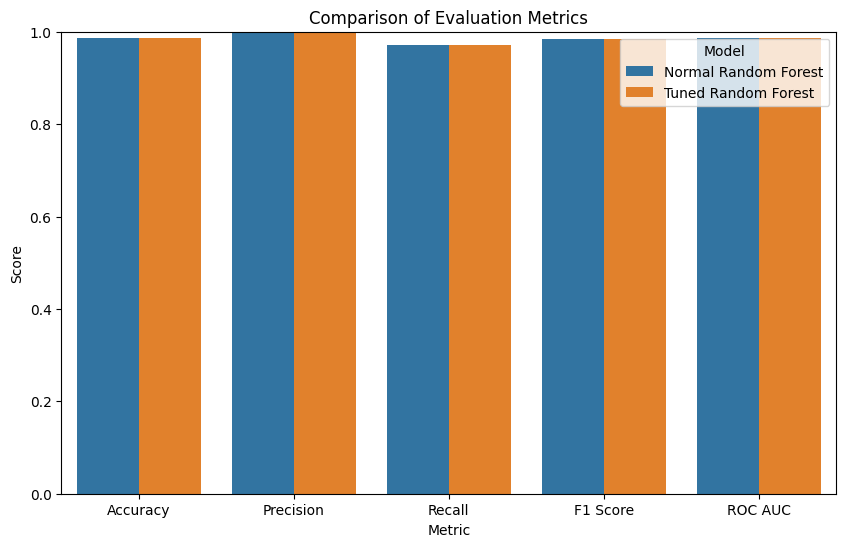

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Normal Random Forest': [
        random_forest_metrics['accuracy'],
        random_forest_metrics['precision'],
        random_forest_metrics['recall'],
        random_forest_metrics['f1_score'],
        random_forest_metrics['roc_auc']
    ],
    'Tuned Random Forest': [
        tuned_rf_metrics['accuracy'],
        tuned_rf_metrics['precision'],
        tuned_rf_metrics['recall'],
        tuned_rf_metrics['f1_score'],
        tuned_rf_metrics['roc_auc']
    ]
})

# Melt the DataFrame for seaborn
comparison_melted = comparison_df.melt(id_vars='Metric', var_name='Model', value_name='Score')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=comparison_melted)
plt.title('Comparison of Evaluation Metrics')
plt.ylim(0, 1)  # Assuming all metrics are between 0 and 1
plt.legend(title='Model')
plt.show()


### Confusion Matrix

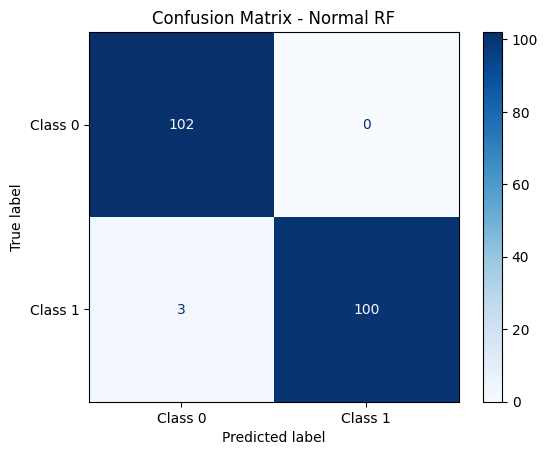

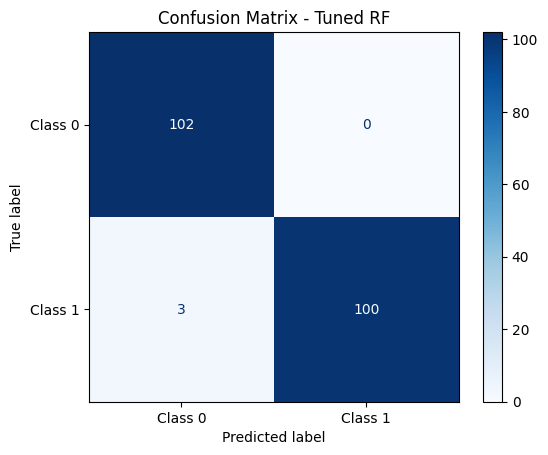

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, title):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred, cmap=plt.cm.Blues, display_labels=['Class 0', 'Class 1']
    )
    plt.title(title)
    plt.show()

# Plot for Normal Random Forest
plot_confusion_matrix(y_test, y_pred_random_forest, "Confusion Matrix - Normal RF")

# Plot for Tuned Random Forest
plot_confusion_matrix(y_test, y_pred_rf_tuned, "Confusion Matrix - Tuned RF")


## SVM

### Training and Evaluating SVM

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate evaluation metrics
svm_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'precision': precision_score(y_test, y_pred_svm),
    'recall': recall_score(y_test, y_pred_svm),
    'f1_score': f1_score(y_test, y_pred_svm),
    'roc_auc': roc_auc_score(y_test, y_pred_svm)
}

# Print the metrics
print("SVM Metrics:", svm_metrics)

SVM Metrics: {'accuracy': 0.8926829268292683, 'precision': 0.8521739130434782, 'recall': 0.9514563106796117, 'f1_score': 0.8990825688073395, 'roc_auc': 0.8923948220064726}


### Hyper Parameter Tuning the SVM Model


In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']         # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Set up the GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=SVC(random_state=42),
                           param_grid=param_grid,
                           scoring='f1',              # Set scoring to F1
                           cv=5,                      # Number of cross-validation folds
                           verbose=2,
                           n_jobs=-1)                 # Use all available cores

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation F1 Score:", best_score)

# Train the best model on the entire training set
best_svm_model = grid_search.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test)

# Calculate evaluation metrics for the best model
best_svm_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_best_svm),
    'precision': precision_score(y_test, y_pred_best_svm),
    'recall': recall_score(y_test, y_pred_best_svm),
    'f1_score': f1_score(y_test, y_pred_best_svm),
    'roc_auc': roc_auc_score(y_test, y_pred_best_svm)
}

# Print the metrics for the best model
print("Best SVM Metrics:", best_svm_metrics)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validation F1 Score: 0.9847698032961191
Best SVM Metrics: {'accuracy': 0.9853658536585366, 'precision': 1.0, 'recall': 0.970873786407767, 'f1_score': 0.9852216748768473, 'roc_auc': 0.9854368932038835}


## SVM Best Fit Parameters

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}

Best Cross-Validation F1 Score: 0.9847698032961191

Best SVM Metrics: {'accuracy': 0.9853658536585366, 'precision': 1.0, 'recall': 0.970873786407767, 'f1_score': 0.9852216748768473, 'roc_auc': 0.9854368932038835}

## SVM Metrices Visualisation


### Comparison of Evaluation Metrics (Bar Chart)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


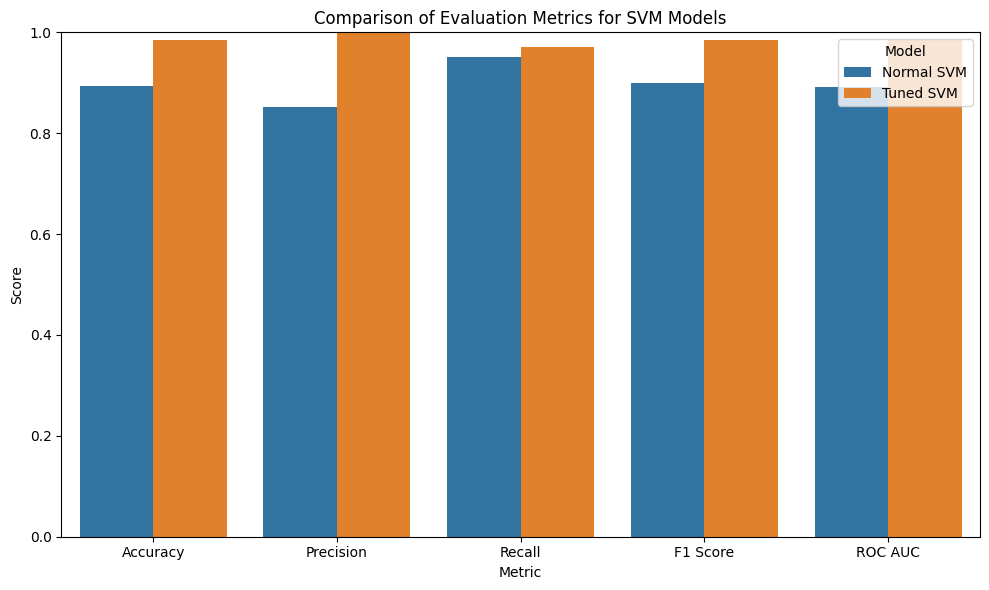

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Evaluation Metrics for Normal SVM ===
svm_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'precision': precision_score(y_test, y_pred_svm),
    'recall': recall_score(y_test, y_pred_svm),
    'f1_score': f1_score(y_test, y_pred_svm),
    'roc_auc': roc_auc_score(y_test, y_pred_svm)
}

# === Evaluation Metrics for Tuned SVM ===
best_svm_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_best_svm),
    'precision': precision_score(y_test, y_pred_best_svm),
    'recall': recall_score(y_test, y_pred_best_svm),
    'f1_score': f1_score(y_test, y_pred_best_svm),
    'roc_auc': roc_auc_score(y_test, y_pred_best_svm)
}

# === Create a DataFrame for Comparison ===
comparison_df_svm = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Normal SVM': [
        svm_metrics['accuracy'],
        svm_metrics['precision'],
        svm_metrics['recall'],
        svm_metrics['f1_score'],
        svm_metrics['roc_auc']
    ],
    'Tuned SVM': [
        best_svm_metrics['accuracy'],
        best_svm_metrics['precision'],
        best_svm_metrics['recall'],
        best_svm_metrics['f1_score'],
        best_svm_metrics['roc_auc']
    ]
})

# === Melt the DataFrame for Seaborn ===
comparison_melted_svm = comparison_df_svm.melt(id_vars='Metric', var_name='Model', value_name='Score')

# === Plotting the Bar Chart ===
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=comparison_melted_svm)
plt.title('Comparison of Evaluation Metrics for SVM Models')
plt.ylim(0, 1)  # Assuming all metrics are between 0 and 1
plt.legend(title='Model')
plt.tight_layout()
plt.show()


### Confusion Matrix


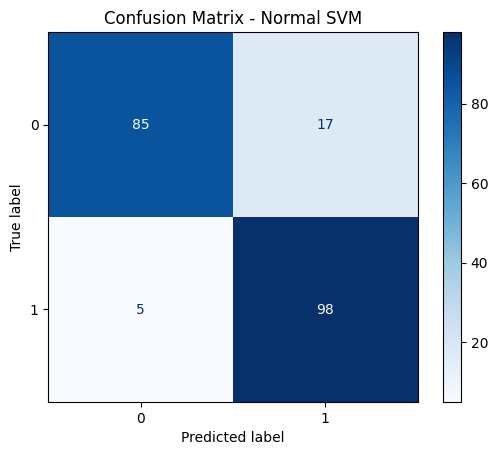

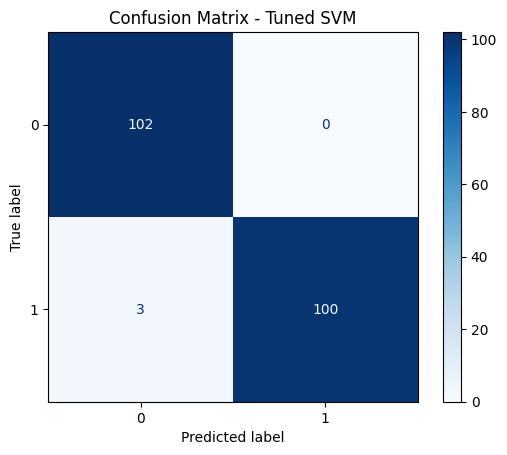

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# === Function to Plot Confusion Matrix ===
def plot_confusion_matrix_custom(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# === Plot Confusion Matrix for Normal SVM ===
plot_confusion_matrix_custom(y_test, y_pred_svm, "Confusion Matrix - Normal SVM")

# === Plot Confusion Matrix for Tuned SVM ===
plot_confusion_matrix_custom(y_test, y_pred_best_svm, "Confusion Matrix - Tuned SVM")


# XGBoost

### Training and evaluating XGBoost


In [34]:
# Import necessary libraries
from xgboost import XGBClassifier

# Initialize XGBoost classifier
xgboost_classifier = XGBClassifier(random_state=42)

# Fit the model
xgboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgboost = xgboost_classifier.predict(X_test)

# Calculate metrics
xgboost_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_xgboost),
    'precision': precision_score(y_test, y_pred_xgboost),
    'recall': recall_score(y_test, y_pred_xgboost),
    'f1_score': f1_score(y_test, y_pred_xgboost),
    'roc_auc': roc_auc_score(y_test, y_pred_xgboost)
}

# Print metrics
print("XGBoost Metrics:", xgboost_metrics)

XGBoost Metrics: {'accuracy': 0.9853658536585366, 'precision': 1.0, 'recall': 0.970873786407767, 'f1_score': 0.9852216748768473, 'roc_auc': 0.9854368932038835}


In [ ]:
# # Specify the file path where you want to save the model
# model_file_path = 'xgboost.joblib'

# # Save the model to disk
# dump(xgboost_classifier, model_file_path)

['xgboost.joblib']

### Hyper Parameter Tuning Gradient Boosting

In [38]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost Classifier
xgboost_classifier = XGBClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'min_child_weight': [1, 2, 4],  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.8, 1.0],         # Fraction of samples to be used for fitting the individual base learners
    'colsample_bytree': [0.8, 1.0]   # Fraction of features to be used for each boosting round
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_classifier,
                           param_grid=param_grid,
                           scoring='f1',  # You can choose other metrics like 'f1', 'roc_auc', etc.
                           cv=5,          # Number of cross-validation folds
                           verbose=2,
                           n_jobs=-1)     # Use all available cores

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Train the best model on the entire training set
best_xgboost = grid_search.best_estimator_
y_pred_best_xgboost = best_xgboost.predict(X_test)

# Calculate evaluation metrics
xgboost_tuned_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_best_xgboost),
    'precision': precision_score(y_test, y_pred_best_xgboost),
    'recall': recall_score(y_test, y_pred_best_xgboost),
    'f1_score': f1_score(y_test, y_pred_best_xgboost),
    'roc_auc': roc_auc_score(y_test, y_pred_best_xgboost)
}

# Print the metrics
print("XGBoost Metrics:", xgboost_tuned_metrics)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}
Best Cross-Validation Score: 0.9857824131418924
XGBoost Metrics: {'accuracy': 0.9853658536585366, 'precision': 1.0, 'recall': 0.970873786407767, 'f1_score': 0.9852216748768473, 'roc_auc': 0.9854368932038835}


## XGboost best fit parameters

Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}

Best Cross-Validation Score: 0.9857824131418924

XGBoost Metrics: {'accuracy': 0.9853658536585366, 'precision': 1.0, 'recall': 0.970873786407767, 'f1_score': 0.9852216748768473, 'roc_auc': 0.9854368932038835}

## XGBoost evaluation metrices visualisation

### Comparison of Evaluation Metrics (Bar Chart)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


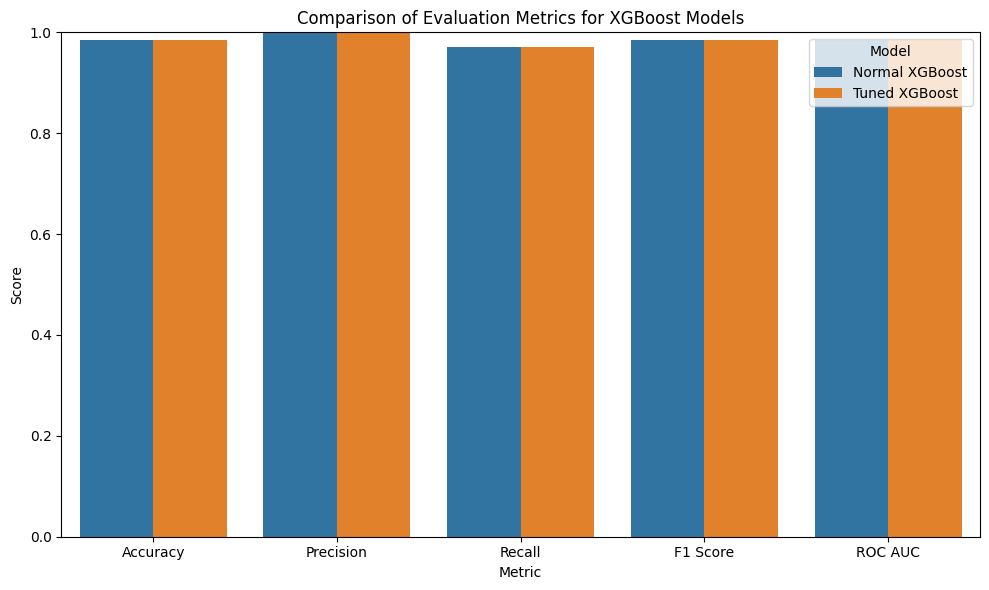

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Evaluation Metrics for Normal XGBoost ===
# Already calculated and stored in xgboost_normal_metrics

# === Evaluation Metrics for Tuned XGBoost ===
# Already calculated and stored in xgboost_tuned_metrics

# === Create a DataFrame for Comparison ===
comparison_df_xgb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Normal XGBoost': [
        xgboost_metrics['accuracy'],
        xgboost_metrics['precision'],
        xgboost_metrics['recall'],
        xgboost_metrics['f1_score'],
        xgboost_metrics['roc_auc']
    ],
    'Tuned XGBoost': [
        xgboost_tuned_metrics['accuracy'],
        xgboost_tuned_metrics['precision'],
        xgboost_tuned_metrics['recall'],
        xgboost_tuned_metrics['f1_score'],
        xgboost_tuned_metrics['roc_auc']
    ]
})

# === Melt the DataFrame for Seaborn ===
comparison_melted_xgb = comparison_df_xgb.melt(id_vars='Metric', var_name='Model', value_name='Score')

# === Plotting the Bar Chart ===
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=comparison_melted_xgb)
plt.title('Comparison of Evaluation Metrics for XGBoost Models')
plt.ylim(0, 1)  # Assuming all metrics are between 0 and 1
plt.legend(title='Model')
plt.tight_layout()
plt.show()


### Confusion Matrix

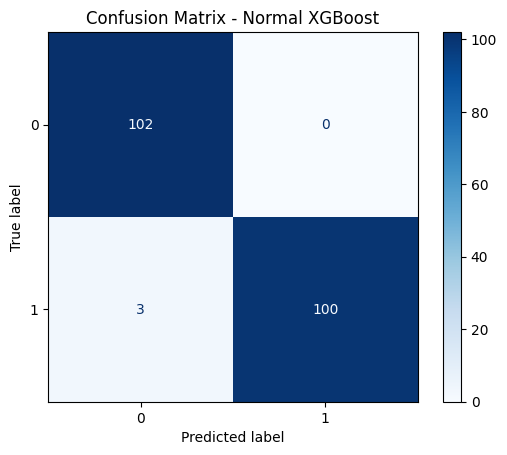

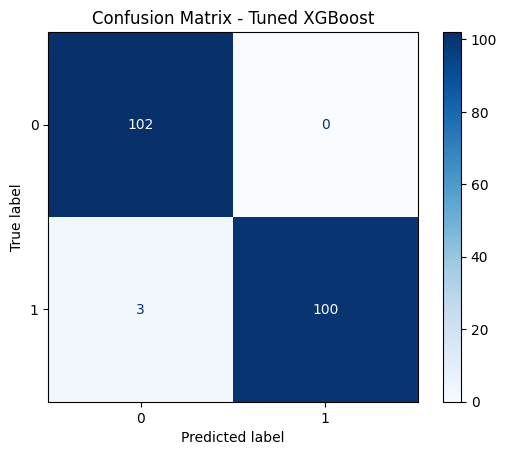

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# === Function to Plot Confusion Matrix ===
def plot_confusion_matrix_custom(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# === Plot Confusion Matrix for Normal XGBoost ===
plot_confusion_matrix_custom(y_test, y_pred_xgboost, "Confusion Matrix - Normal XGBoost")

# === Plot Confusion Matrix for Tuned XGBoost ===
plot_confusion_matrix_custom(y_test, y_pred_best_xgboost, "Confusion Matrix - Tuned XGBoost")


## LightGBM

### Training and Evaluating LightGBM

In [40]:
# Import necessary libraries
from lightgbm import LGBMClassifier

# Initialize LightGBM classifier
lgbm_classifier = LGBMClassifier(random_state=42)

# Fit the model
lgbm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_classifier.predict(X_test)

# Calculate metrics
lgbm_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_lgbm),
    'precision': precision_score(y_test, y_pred_lgbm),
    'recall': recall_score(y_test, y_pred_lgbm),
    'f1_score': f1_score(y_test, y_pred_lgbm),
    'roc_auc': roc_auc_score(y_test, y_pred_lgbm)
}

# Print metrics
print("LightGBM Metrics:", lgbm_metrics)


[LightGBM] [Info] Number of positive: 423, number of negative: 397
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 820, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515854 -> initscore=0.063436
[LightGBM] [Info] Start training from score 0.063436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Metrics: {'accuracy': 0.9853658536585366, 'precision': 1.0, 'recall

### Hyperparameter Tuning LightGBM

In [43]:
# Initialize LightGBM classifier
lgbm_classifier_tuned = LGBMClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=lgbm_classifier_tuned,
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=1)

# Fit the Grid Search
grid_search.fit(X_train, y_train)

# Get the best estimator from Grid Search
best_lgbm_classifier = grid_search.best_estimator_

# Make predictions with the best estimator
y_pred_lgbm_tuned = best_lgbm_classifier.predict(X_test)

# Calculate metrics for the tuned model
lgbm_tuned_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_lgbm_tuned),
    'precision': precision_score(y_test, y_pred_lgbm_tuned),
    'recall': recall_score(y_test, y_pred_lgbm_tuned),
    'f1_score': f1_score(y_test, y_pred_lgbm_tuned),
    'roc_auc': roc_auc_score(y_test, y_pred_lgbm_tuned)
}

# Print metrics for the tuned model
print("Tuned LightGBM Metrics:", lgbm_tuned_metrics)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 423, number of negative: 397
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 820, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515854 -> initscore=0.063436
[LightGBM] [Info] Start training from score 0.063436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

## LightGBM evaluation metrices visualisation

### Comparison of Evaluation Metrics (Bar Chart)

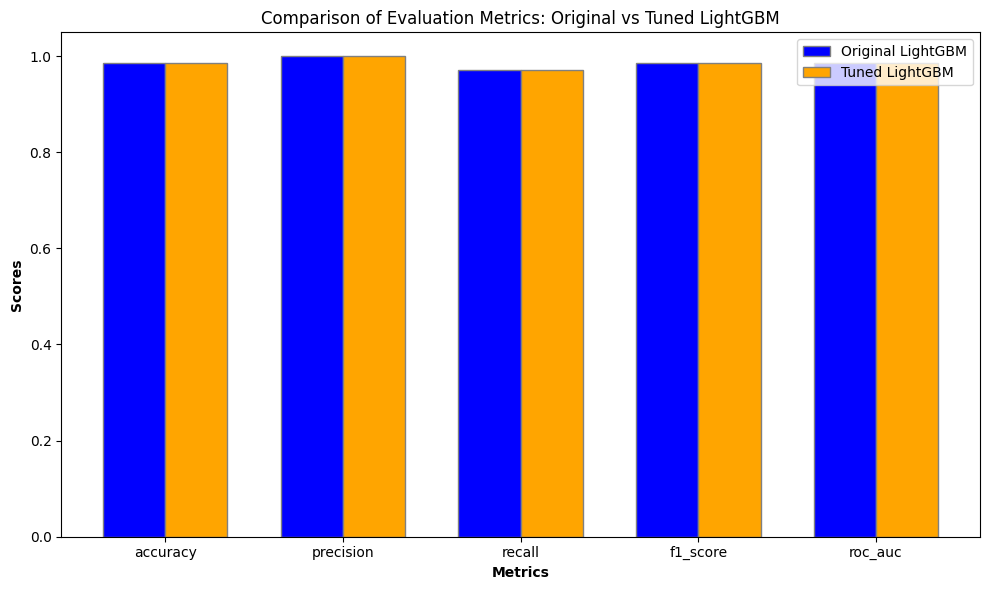

In [44]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Metrics for original and tuned models
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
original_metrics = [
    lgbm_metrics['accuracy'],
    lgbm_metrics['precision'],
    lgbm_metrics['recall'],
    lgbm_metrics['f1_score'],
    lgbm_metrics['roc_auc']
]
tuned_metrics = [
    lgbm_tuned_metrics['accuracy'],
    lgbm_tuned_metrics['precision'],
    lgbm_tuned_metrics['recall'],
    lgbm_tuned_metrics['f1_score'],
    lgbm_tuned_metrics['roc_auc']
]

# Set bar width and positions
bar_width = 0.35
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, original_metrics, color='blue', width=bar_width, edgecolor='grey', label='Original LightGBM')
plt.bar(r2, tuned_metrics, color='orange', width=bar_width, edgecolor='grey', label='Tuned LightGBM')

# Add labels and title
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(metrics))], metrics)
plt.ylabel('Scores', fontweight='bold')
plt.title('Comparison of Evaluation Metrics: Original vs Tuned LightGBM')
plt.legend()
plt.tight_layout()
plt.show()


### Confusion Matrix

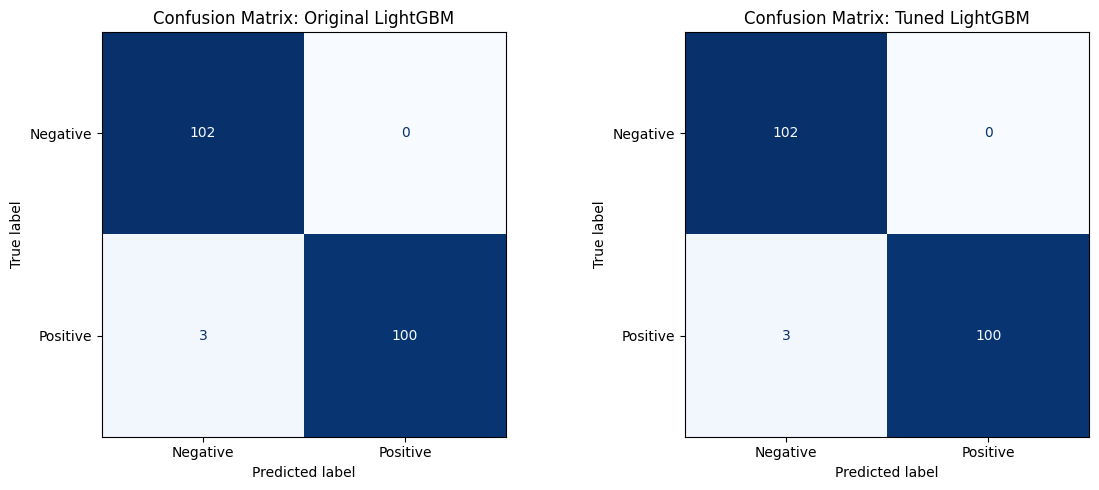

In [51]:
# Import necessary libraries for confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrices
cm_original = confusion_matrix(y_test, y_pred_lgbm)
cm_tuned = confusion_matrix(y_test, y_pred_lgbm_tuned)

# Create subplots for confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original LightGBM confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_original, display_labels=['Negative', 'Positive']).plot(ax=ax[0], cmap='Blues', colorbar=False)
ax[0].set_title('Confusion Matrix: Original LightGBM')

# Tuned LightGBM confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['Negative', 'Positive']).plot(ax=ax[1], cmap='Blues', colorbar=False)
ax[1].set_title('Confusion Matrix: Tuned LightGBM')

plt.tight_layout()
plt.show()


# AdaBoost

### Training and evaluating AdaBoost

In [46]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Fit the model
adaboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Calculate metrics
adaboost_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_adaboost),
    'precision': precision_score(y_test, y_pred_adaboost),
    'recall': recall_score(y_test, y_pred_adaboost),
    'f1_score': f1_score(y_test, y_pred_adaboost),
    'roc_auc': roc_auc_score(y_test, y_pred_adaboost)
}

# Print metrics
print("AdaBoost Metrics:", adaboost_metrics)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Metrics: {'accuracy': 0.8585365853658536, 'precision': 0.87, 'recall': 0.8446601941747572, 'f1_score': 0.8571428571428571, 'roc_auc': 0.8586046068913002}


### Hyper Parameter Tuning AdaBoost

In [47]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],    # Number of base estimators
    'learning_rate': [0.01, 0.1, 1]    # Step size for each iteration
}

# Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5, scoring='f1')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_adaboost_classifier = grid_search.best_estimator_

# Make predictions
y_pred_best_adaboost = best_adaboost_classifier.predict(X_test)

# Calculate metrics
best_adaboost_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_best_adaboost),
    'precision': precision_score(y_test, y_pred_best_adaboost),
    'recall': recall_score(y_test, y_pred_best_adaboost),
    'f1_score': f1_score(y_test, y_pred_best_adaboost),
    'roc_auc': roc_auc_score(y_test, y_pred_best_adaboost)
}

# Print metrics
print("Best AdaBoost Metrics:", best_adaboost_metrics)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best AdaBoost Metrics: {'accuracy': 0.9024390243902439, 'precision': 0.9191919191919192, 'recall': 0.883495145631068, 'f1_score': 0.900990099009901, 'roc_auc': 0.9025318865410242}


## AdaBoost Evaluation Metrices Visualtisation

### Comparison of Evaluation Metrics (Bar Chart)

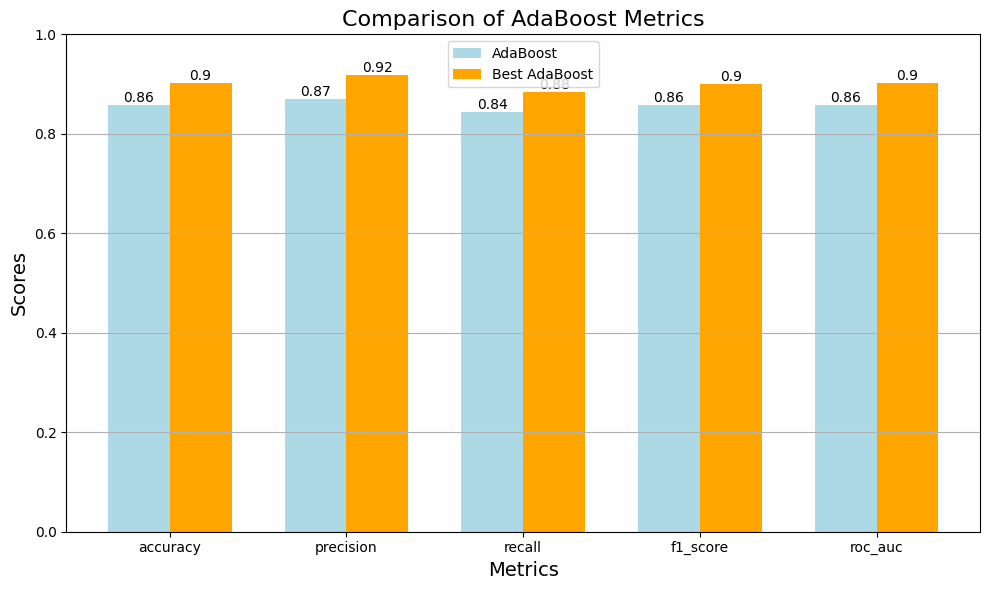

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Extract metrics for plotting
metrics_names = list(adaboost_metrics.keys())
adaboost_values = list(adaboost_metrics.values())
best_adaboost_values = list(best_adaboost_metrics.values())

# Set up bar width and positions
bar_width = 0.35
index = np.arange(len(metrics_names))

# Create the bar plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(index, adaboost_values, bar_width, label='AdaBoost', color='lightblue')
bars2 = plt.bar(index + bar_width, best_adaboost_values, bar_width, label='Best AdaBoost', color='orange')

# Adding labels and title
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Comparison of AdaBoost Metrics', fontsize=16)
plt.xticks(index + bar_width / 2, metrics_names)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')

# Display the values on top of the bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Confusion Matrix

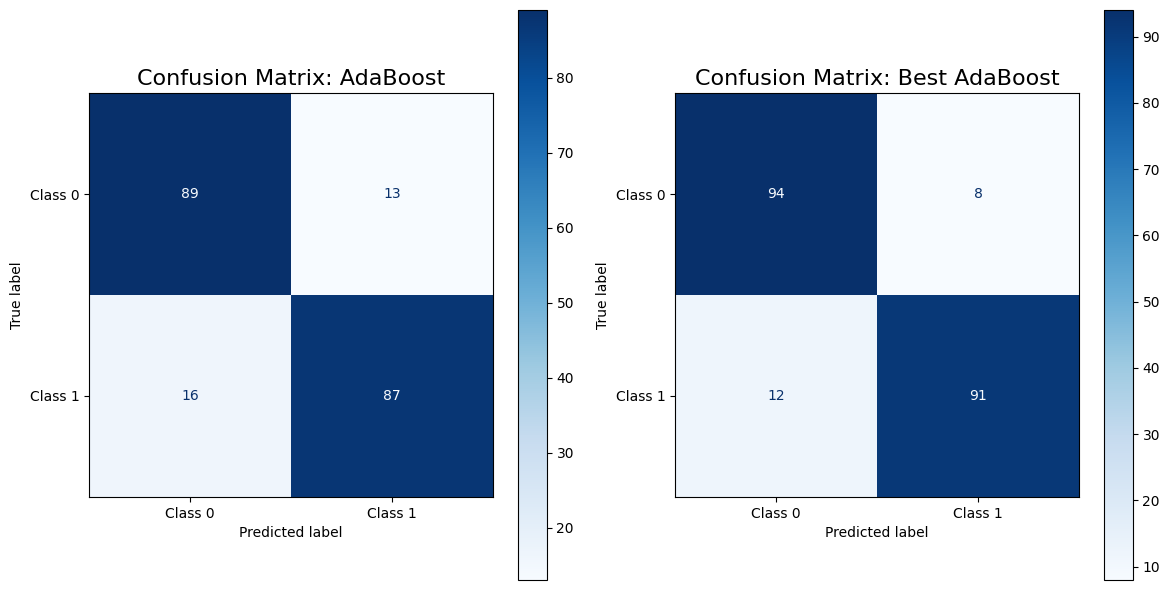

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrices
confusion_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
confusion_matrix_best_adaboost = confusion_matrix(y_test, y_pred_best_adaboost)

# Create confusion matrix displays
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for AdaBoost
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_adaboost, display_labels=["Class 0", "Class 1"])
disp1.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Confusion Matrix: AdaBoost', fontsize=16)

# Plot for Best AdaBoost
disp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_best_adaboost, display_labels=["Class 0", "Class 1"])
disp2.plot(ax=axes[1], cmap='Blues', values_format='d')
axes[1].set_title('Confusion Matrix: Best AdaBoost', fontsize=16)

plt.tight_layout()
plt.show()


# CatBoost

### Training and Evaluating CatBoost

In [54]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00


In [55]:
# Import necessary libraries
from catboost import CatBoostClassifier

# Initialize CatBoost classifier
catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)  # Set verbose=0 to suppress training output

# Fit the model
catboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred_catboost = catboost_classifier.predict(X_test)

# Calculate metrics
catboost_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_catboost),
    'precision': precision_score(y_test, y_pred_catboost),
    'recall': recall_score(y_test, y_pred_catboost),
    'f1_score': f1_score(y_test, y_pred_catboost),
    'roc_auc': roc_auc_score(y_test, y_pred_catboost)
}

# Print metrics
print("CatBoost Metrics:", catboost_metrics)


CatBoost Metrics: {'accuracy': 0.9853658536585366, 'precision': 1.0, 'recall': 0.970873786407767, 'f1_score': 0.9852216748768473, 'roc_auc': 0.9854368932038835}


### Hyper Parameter tuning CatBooost

In [56]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [100, 200],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize CatBoost classifier
catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid,
                           scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_catboost_classifier = grid_search.best_estimator_

# Make predictions
y_pred_best_catboost = best_catboost_classifier.predict(X_test)

# Calculate metrics
best_catboost_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_best_catboost),
    'precision': precision_score(y_test, y_pred_best_catboost),
    'recall': recall_score(y_test, y_pred_best_catboost),
    'f1_score': f1_score(y_test, y_pred_best_catboost),
    'roc_auc': roc_auc_score(y_test, y_pred_best_catboost)
}

# Print metrics
print("Best CatBoost Metrics:", best_catboost_metrics)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best CatBoost Metrics: {'accuracy': 0.9853658536585366, 'precision': 1.0, 'recall': 0.970873786407767, 'f1_score': 0.9852216748768473, 'roc_auc': 0.9854368932038835}


## CatBoost Evaluation Metrices Visualisation

### Comparison of Evaluation Metrics (Bar Chart)

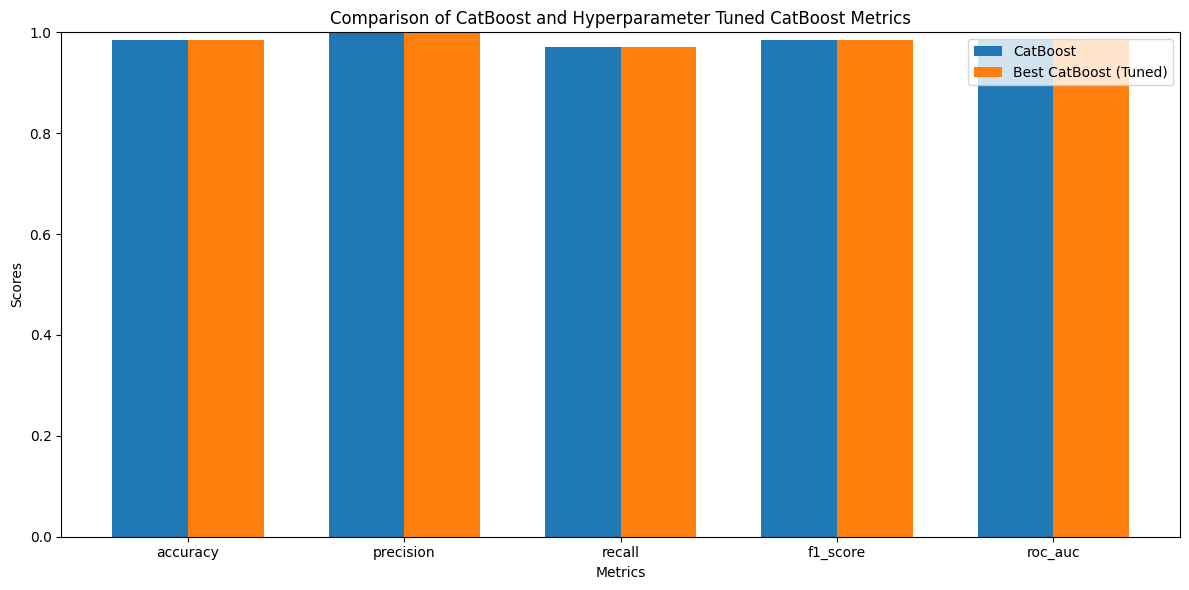

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for original CatBoost model
catboost_metrics_values = list(catboost_metrics.values())
# Metrics for hyperparameter-tuned CatBoost model
best_catboost_metrics_values = list(best_catboost_metrics.values())

# Metric names
metrics_names = list(catboost_metrics.keys())

# Bar width and positions
bar_width = 0.35
x = np.arange(len(metrics_names))

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, catboost_metrics_values, bar_width, label='CatBoost')
plt.bar(x + bar_width/2, best_catboost_metrics_values, bar_width, label='Best CatBoost (Tuned)')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of CatBoost and Hyperparameter Tuned CatBoost Metrics')
plt.xticks(x, metrics_names)
plt.ylim(0, 1)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### Confusion Matrix

<Figure size 1200x600 with 0 Axes>

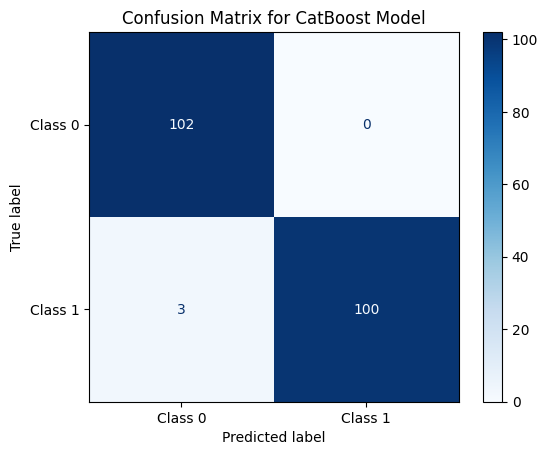

<Figure size 1200x600 with 0 Axes>

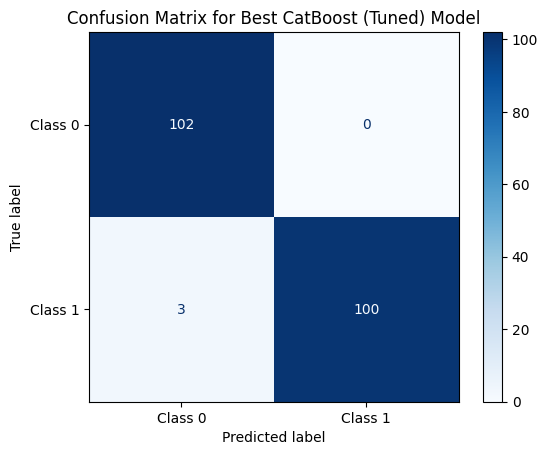

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for original CatBoost model
cm_catboost = confusion_matrix(y_test, y_pred_catboost)

# Confusion matrix for hyperparameter-tuned CatBoost model
cm_best_catboost = confusion_matrix(y_test, y_pred_best_catboost)

# Plotting confusion matrix for original CatBoost
plt.figure(figsize=(12, 6))
disp_catboost = ConfusionMatrixDisplay(confusion_matrix=cm_catboost, display_labels=['Class 0', 'Class 1'])
disp_catboost.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for CatBoost Model')
plt.show()

# Plotting confusion matrix for hyperparameter-tuned CatBoost
plt.figure(figsize=(12, 6))
disp_best_catboost = ConfusionMatrixDisplay(confusion_matrix=cm_best_catboost, display_labels=['Class 0', 'Class 1'])
disp_best_catboost.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best CatBoost (Tuned) Model')
plt.show()


# MLP

### Training and Evaluating MLP

In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the MLP model
mlp_model = MLPClassifier(random_state=42, max_iter=500)

# Train the model on the training data
mlp_model.fit(X_train, y_train)

# Predict on the test data
y_pred_mlp = mlp_model.predict(X_test)

# Calculate evaluation metrics
mlp_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_mlp),
    'precision': precision_score(y_test, y_pred_mlp),
    'recall': recall_score(y_test, y_pred_mlp),
    'f1_score': f1_score(y_test, y_pred_mlp),
    'roc_auc': roc_auc_score(y_test, y_pred_mlp)
}

# Print the metrics
print("MLP Metrics:", mlp_metrics)

MLP Metrics: {'accuracy': 0.9707317073170731, 'precision': 1.0, 'recall': 0.941747572815534, 'f1_score': 0.97, 'roc_auc': 0.970873786407767}


### HyperParameter Tuning MLP

In [60]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  # Number of neurons in hidden layers
    'activation': ['logistic', 'tanh', 'relu'],                     # Activation function for hidden layers
    'solver': ['adam', 'sgd'],                                     # Weight optimization algorithm
    'learning_rate': ['constant', 'adaptive'],                     # Learning rate schedule for weight updates
    'max_iter': [200, 500]                                         # Maximum number of iterations
}

# Set up the GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=MLPClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='f1',              # Set scoring to F1
                           cv=5,                      # Number of cross-validation folds
                           verbose=2,
                           n_jobs=-1)                 # Use all available cores

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation F1 Score:", best_score)

# Train the best model on the entire training set
best_mlp_model = grid_search.best_estimator_
y_pred_best_mlp = best_mlp_model.predict(X_test)

# Calculate evaluation metrics for the best model
best_mlp_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_best_mlp),
    'precision': precision_score(y_test, y_pred_best_mlp),
    'recall': recall_score(y_test, y_pred_best_mlp),
    'f1_score': f1_score(y_test, y_pred_best_mlp),
    'roc_auc': roc_auc_score(y_test, y_pred_best_mlp)
}

# Print the metrics for the best model
print("Best MLP Metrics:", best_mlp_metrics)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Best Cross-Validation F1 Score: 0.982107509938208
Best MLP Metrics: {'accuracy': 0.9707317073170731, 'precision': 1.0, 'recall': 0.941747572815534, 'f1_score': 0.97, 'roc_auc': 0.970873786407767}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Best Fit Parameters for MLP

Fitting 5 folds for each of 96 candidates, totalling 480 fits

Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}

Best Cross-Validation F1 Score: 0.982107509938208

Best MLP Metrics: {'accuracy': 0.9707317073170731, 'precision': 1.0, 'recall': 0.941747572815534, 'f1_score': 0.97, 'roc_auc': 0.970873786407767}

## MLP Evaluation Metrices Visualisation

### Comparison of Evaluation Metrics (Bar Chart)

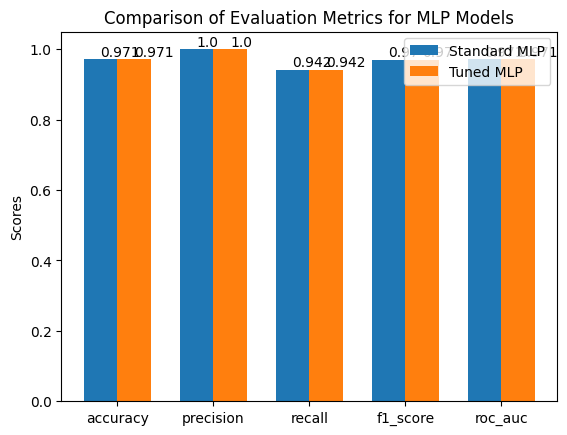

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics for both models
metrics_names = list(mlp_metrics.keys())
metrics_values = list(mlp_metrics.values())
best_metrics_values = list(best_mlp_metrics.values())

# Set the positions and width for the bars
x = np.arange(len(metrics_names))  # the label locations
width = 0.35  # the width of the bars

# Create the bar plot
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, metrics_values, width, label='Standard MLP')
bars2 = ax.bar(x + width/2, best_metrics_values, width, label='Tuned MLP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics for MLP Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

# Add data labels on top of the bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom')  # va: vertical alignment

plt.show()


### Confusion Matrix

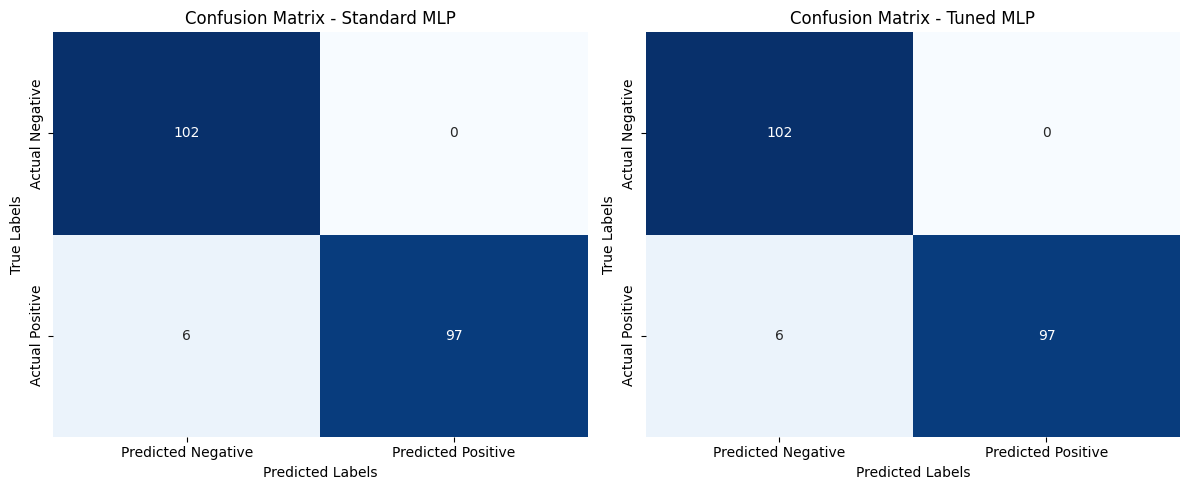

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrices
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
conf_matrix_best_mlp = confusion_matrix(y_test, y_pred_best_mlp)

# Plot confusion matrix for the standard MLP model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Standard MLP')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Plot confusion matrix for the tuned MLP model
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_best_mlp, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Tuned MLP')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


# RNN

### Training and Evaluating RNN

In [63]:
# Importing necessary libraries for RNN
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Reshaping the data for RNN input
X_train_rnn = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Building the RNN model with Input layer
model = Sequential()
model.add(Input(shape=(X_train_rnn.shape[1], 1)))  # Define input shape here
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model
model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=1)

# Making predictions
y_pred_prob = model.predict(X_test_rnn)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Printing evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.4926 - loss: 0.6922
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5934 - loss: 0.6808
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6139 - loss: 0.6545
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6893 - loss: 0.6000
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7127 - loss: 0.5700
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7369 - loss: 0.5044
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7518 - loss: 0.4911
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7368 - loss: 0.5156
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7870 - loss: 0.4629
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7764 - loss: 0.4694
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7820 - loss: 0.4347
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy:

### Hyper Parameter Tuning RNN

In [64]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [66]:
# Reshaping the data for RNN input
X_train_rnn_tuned = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_rnn_tuned = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Building the RNN model with Input layer
model_tuned = Sequential()
model_tuned.add(Input(shape=(X_train_rnn_tuned.shape[1], 1)))  # Define input shape here
model_tuned.add(LSTM(100, return_sequences=True))  # Adjusted LSTM units
model_tuned.add(Dropout(0.3))  # Adjusted Dropout rate
model_tuned.add(LSTM(100))  # Adjusted LSTM units
model_tuned.add(Dropout(0.3))  # Adjusted Dropout rate
model_tuned.add(Dense(1, activation='sigmoid'))

# Compiling the model
model_tuned.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model
model_tuned.fit(X_train_rnn_tuned, y_train, epochs=100, batch_size=16, verbose=1)  # Adjusted epochs and batch size

# Making predictions
y_pred_prob_tuned = model_tuned.predict(X_test_rnn_tuned)
y_pred_tuned = (y_pred_prob_tuned > 0.5).astype(int)

# Evaluating the model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_prob_tuned)

# Printing evaluation metrics
print(f'Accuracy: {accuracy_tuned:.4f}')
print(f'Precision: {precision_tuned:.4f}')
print(f'Recall: {recall_tuned:.4f}')
print(f'F1 Score: {f1_tuned:.4f}')
print(f'ROC AUC: {roc_auc_tuned:.4f}')


Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.5111 - loss: 0.6902
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.6923 - loss: 0.6047
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7049 - loss: 0.5711
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7367 - loss: 0.5147
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7741 - loss: 0.4816
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7668 - loss: 0.4395
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.7752 - loss: 0.4503
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7886 - loss: 0.4325
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8222 - loss: 0.3890
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7883 - loss: 0.4342
Epoch 11/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8451 - loss: 0.3737
Epoch 12/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/ste

## RNN Metrices Visualisation

### Comparision of Evaluation Metrices (Bar Chart)

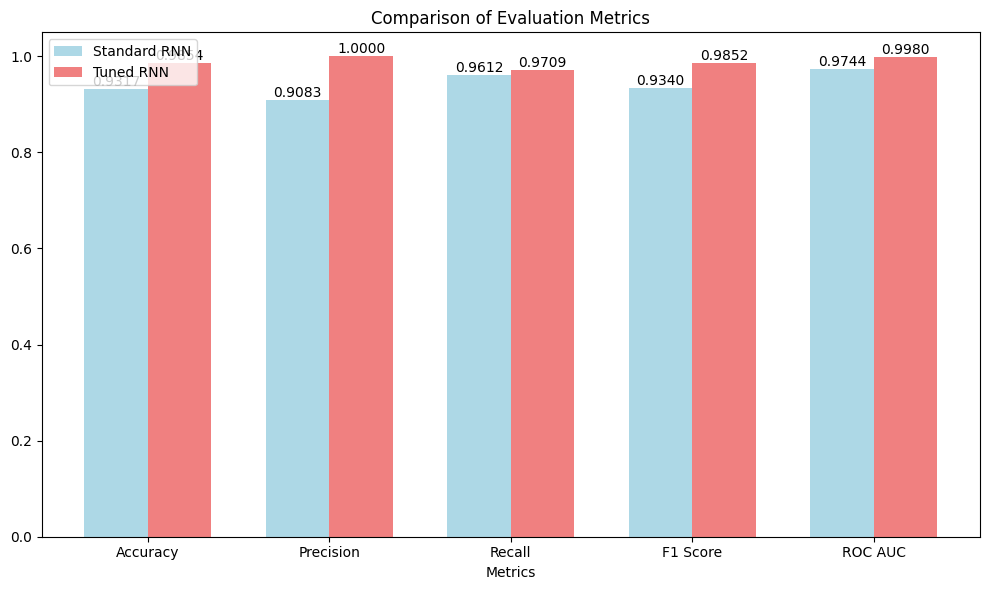

In [67]:
import matplotlib.pyplot as plt

# Evaluation metrics for standard and tuned models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
standard_metrics = [accuracy, precision, recall, f1, roc_auc]
tuned_metrics = [accuracy_tuned, precision_tuned, recall_tuned, f1_tuned, roc_auc_tuned]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, standard_metrics, width, label='Standard RNN', color='lightblue')
bars2 = ax.bar(x + width/2, tuned_metrics, width, label='Tuned RNN', color='lightcoral')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Adding value labels on top of the bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Confusioon Matrix

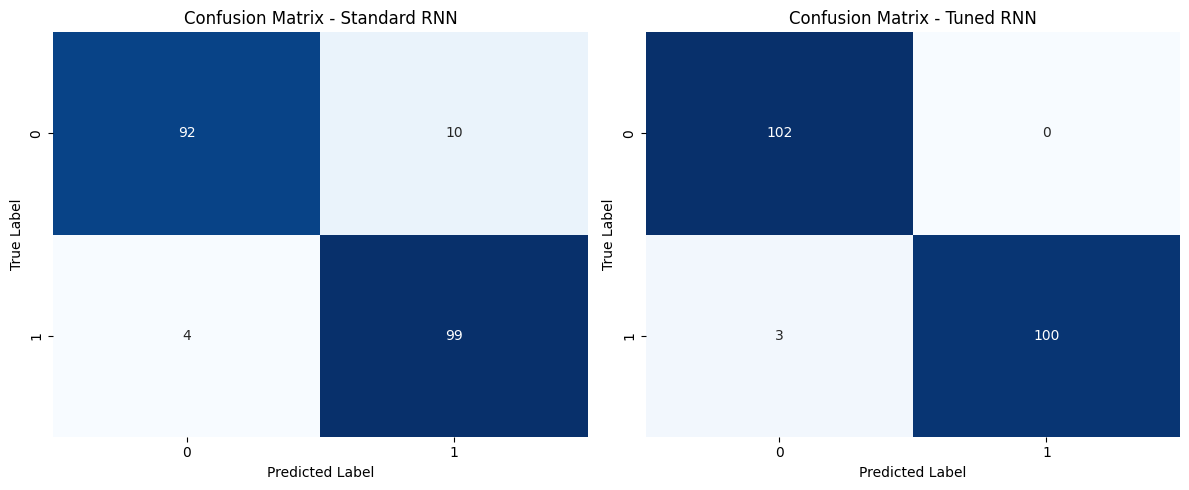

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrices
cm_standard = confusion_matrix(y_test, y_pred)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# Plotting confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Standard RNN confusion matrix
sns.heatmap(cm_standard, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('Confusion Matrix - Standard RNN')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Tuned RNN confusion matrix
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=False)
axes[1].set_title('Confusion Matrix - Tuned RNN')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Predicting using user's input

In [ ]:
# Load the saved model
model_file_path = 'xgboost.joblib'
gradient_boosting = load(model_file_path)

# Simulate user input
user_input = {
    'age': int(input("Enter your age: ")),
    'sex': int(input("Enter your sex (1: male, 0: female): ")),
    'cp': int(input("Enter chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic): ")),
    'trestbps': int(input("Enter resting blood pressure (in mm Hg): ")),
    'chol': int(input("Enter serum cholesterol in mg/dl: ")),
    'fbs': int(input("Enter fasting blood sugar > 120 mg/dl (1: true, 0: false): ")),
    'restecg': int(input("Enter resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy): ")),
    'thalach': int(input("Enter maximum heart rate achieved: ")),
    'exang': int(input("Enter exercise induced angina (1: yes, 0: no): ")),
    'oldpeak': float(input("Enter ST depression induced by exercise relative to rest: ")),
    'slope': int(input("Enter the slope of the peak exercise ST segment (0: upsloping, 1: flat 2: downsloping): ")),
    'ca': int(input("Enter number of major vessels colored by fluoroscopy (0-3): ")),
    'thal': int(input("Enter thalassemia (1: normal, 2: fixed defect, 3: reversable defect): "))
}
# Convert user input to DataFrame
input_df = pd.DataFrame(user_input, index=[0])

# One-hot encode the user input to match the training data
input_df_encoded = pd.get_dummies(input_df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Align input with training data columns (features.columns)
for column in features.columns:
    if column not in input_df_encoded.columns:
        input_df_encoded[column] = 0

# Ensure the column order matches the training data
input_df_encoded = input_df_encoded[features.columns]

# Scale the user input
scaled_input = scaler.transform(input_df_encoded)

# Make prediction
user_prediction = gradient_boosting.predict(scaled_input)
user_prediction_proba = gradient_boosting.predict_proba(scaled_input)

# Display the result as a percentage
prediction_percentage = user_prediction_proba[0][1] * 100

if user_prediction[0] == 1:
    print(f"The model predicts that the user is at risk of heart disease with a probability of {prediction_percentage:.2f}%.")
else:
    print(f"The model predicts that the user is not at risk of heart disease with a probability of {100 - prediction_percentage:.2f}%.")


Enter your age: 21
Enter your sex (1: male, 0: female): 1
Enter chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic): 3
Enter resting blood pressure (in mm Hg): 150
Enter serum cholesterol in mg/dl: 100
Enter fasting blood sugar > 120 mg/dl (1: true, 0: false): 0
Enter resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy): 0
Enter maximum heart rate achieved: 130
Enter exercise induced angina (1: yes, 0: no): 0
Enter ST depression induced by exercise relative to rest: 100
Enter the slope of the peak exercise ST segment (0: upsloping, 1: flat 2: downsloping): 1
Enter number of major vessels colored by fluoroscopy (0-3): 0
Enter thalassemia (1: normal, 2: fixed defect, 3: reversable defect): 2
The model predicts that the user is not at risk of heart disease with a probability of 76.94%.
